In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pickle
from scipy.ndimage.measurements import label


[((800, 400), (900, 500)), ((850, 400), (950, 500)), ((1050, 400), (1150, 500)), ((1100, 400), (1200, 500)), ((1150, 400), (1250, 500)), ((875, 400), (925, 450)), ((1075, 400), (1125, 450)), ((825, 425), (875, 475)), ((814, 400), (889, 475)), ((851, 400), (926, 475)), ((1073, 400), (1148, 475)), ((1147, 437), (1222, 512)), ((1184, 437), (1259, 512)), ((400, 400), (500, 500))]


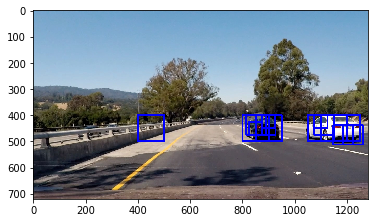

In [41]:
with open("bbox_pickle.p", 'rb') as f:
    box_list = pickle.load(f)
test_image = mpimg.imread("test_image.jpg")
copy_image = np.copy(test_image)
print(box_list)
for box in box_list:
    cv2.rectangle(copy_image, box[0], box[1],  (0,0,255), 6)
plt.imshow(copy_image)

In [24]:
heat = np.zeros_like(test_image[:,:,0]).astype(np.float)
print(test_image.shape)
print(heat.shape)

(720, 1280, 3)
(720, 1280)


In [29]:
def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    
    return heatmap

In [17]:
def apply_threshold(heatmap, threshold):
    heatmap[heatmap <= threshold] = 0
    return heatmap

In [15]:
def draw_labeled_box(img, labels):
    for car_number in range(1, labels[1]+1):
        nonzero = (car_number == labels[0]).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        box = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        cv2.rectangle(img, box[0], box[1], (0, 0, 255), 6)
    return img

In [42]:
heat = add_heat(heat, box_list)
heat = apply_threshold(heat, 2)
heatmap = np.clip(heat, 0, 255)
labels = label(heat)
fixed_box_img = draw_labeled_box(np.copy(test_image), labels)

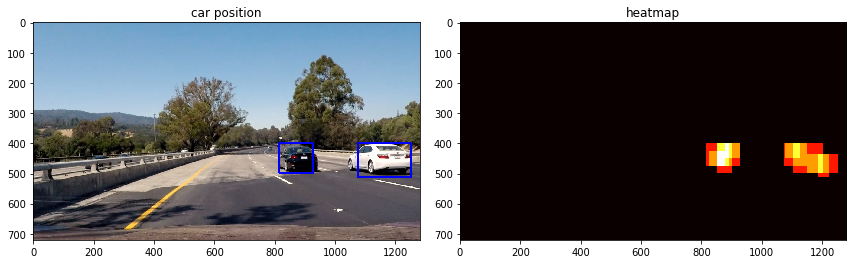

In [43]:
fig = plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(fixed_box_img)
plt.title("car position")
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title("heatmap")
fig.tight_layout()